In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import numpy as np

In [2]:
df = pd.read_csv('chucks/chuck_0.csv', sep=';')

In [3]:
# keep only these features
features = df[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature', 'precipitation', 'windspeed_10m', 'sum_pollen']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
eps_values = [1.5, 2]
min_samples_values = [20, 50]

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(features_scaled)
        score = silhouette_score(features_scaled, labels)
        
        print(f"Eps={eps}, Min Samples={min_samples}, Silhouette Score={score}")
        
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: Eps={best_eps}, Min Samples={best_min_samples}, Silhouette Score={best_score}")


# eps_values = [0.1, 0.5, 1.0, 1.5]
# min_samples_values = [5, 10, 20]
# Eps=0.1, Min Samples=5, Silhouette Score=-0.44812748412393494
# Eps=0.1, Min Samples=10, Silhouette Score=-0.21109172141824437
# Eps=0.1, Min Samples=20, Silhouette Score=-0.21123978328834905
# Eps=0.5, Min Samples=5, Silhouette Score=-0.5479639931081108
# Eps=0.5, Min Samples=10, Silhouette Score=-0.5482374513163959
# Eps=0.5, Min Samples=20, Silhouette Score=-0.45101973715868254
# Eps=1.0, Min Samples=5, Silhouette Score=-0.3687515261185174
# Eps=1.0, Min Samples=10, Silhouette Score=-0.2974022792302073
# Eps=1.0, Min Samples=20, Silhouette Score=-0.17053598766060346
# Eps=1.5, Min Samples=5, Silhouette Score=0.009379772046798357
# Eps=1.5, Min Samples=10, Silhouette Score=0.05709655658986091
# Eps=1.5, Min Samples=20, Silhouette Score=0.06642544233059569
# Best Parameters: Eps=1.5, Min Samples=20, Silhouette Score=0.06642544233059569


# eps_values = [1.5, 2]
# min_samples_values = [20, 50]
# Eps=1.5, Min Samples=20, Silhouette Score=0.06642544233059569
# Eps=1.5, Min Samples=50, Silhouette Score=0.03251506592649707
# Eps=2, Min Samples=20, Silhouette Score=0.16660320632658981
# Eps=2, Min Samples=50, Silhouette Score=0.2664896218838388
# Best Parameters: Eps=2, Min Samples=50, Silhouette Score=0.2664896218838388

In [4]:
# epsilon = 1.5
# min_samples = 20

epsilon = 2
min_samples = 50

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, n_jobs=-1)


dbscan.fit(features_scaled)
clusters = dbscan.labels_

df['cluster'] = clusters

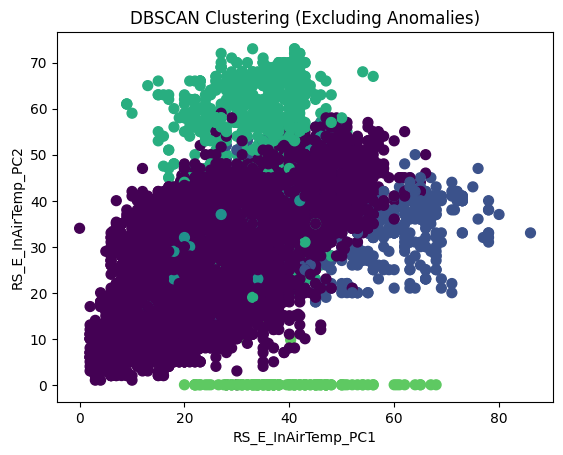

In [5]:
# Keep only values assigned to a cluster
valid_clusters = clusters != -1
valid_data = df[valid_clusters]

plt.scatter(valid_data["RS_E_InAirTemp_PC1"], valid_data["RS_E_InAirTemp_PC2"], c=clusters[valid_clusters], cmap='viridis', s=50)

plt.title('DBSCAN Clustering (Excluding Anomalies)')
plt.xlabel('RS_E_InAirTemp_PC1')
plt.ylabel('RS_E_InAirTemp_PC2')
plt.show()

In [6]:
# Show average values for each cluster
cluster_means = df.groupby('cluster').mean()

print("Cluster Means:")
cluster_means

Cluster Means:


C:\Users\Ben\AppData\Local\Temp\ipykernel_7608\2636490789.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
cluster,,,,,,,,,,,,,,,,,
-1,155.887644,50.883938,4.417376,25.954194,26.578637,283.129646,277.370785,777.215727,778.136921,57.906668,57.364852,63.478456,63.473440,12.698495,0.271159,13.627931,51.126076
0,151.996067,50.900864,4.250637,31.869319,31.815137,270.732012,276.292935,963.020849,963.916584,79.118335,78.534954,78.394124,78.264812,14.890710,0.100869,13.149370,21.382657
1,122.219331,50.947553,3.675495,37.589219,35.178439,185.347584,246.016729,815.901487,815.864312,81.594796,82.804833,81.988848,0.070632,19.385130,0.057621,9.931599,1.655762
2,155.389563,51.022977,4.477919,43.017867,34.768204,4.692354,249.803061,0.698759,936.687770,41.782565,79.539846,47.195287,80.282531,18.862136,0.018811,10.942597,5.725121
3,122.000000,50.931369,3.697686,41.316667,40.158333,289.725000,408.508333,1560.016667,1554.525000,86.308333,87.783333,87.950000,0.000000,19.680000,0.075000,10.181667,1.560000
4,131.000000,50.327007,4.415204,33.136701,35.435364,690.000000,690.000000,867.586924,871.390788,81.497771,81.172363,78.328380,79.867756,14.449183,0.038187,12.278752,21.046657
5,146.494878,51.030197,4.433796,32.982664,46.256107,240.109522,4.975571,867.786617,1.249409,79.657998,46.913318,78.266299,47.686893,16.466430,0.050749,13.094247,6.658077
6,163.757353,51.133160,5.031506,39.467525,0.348652,383.413603,4.263480,1663.401961,22.231005,84.199142,0.000000,83.051471,84.072304,18.388971,0.018382,11.508824,4.233824
7,147.687500,50.849406,4.234885,22.250000,24.819444,465.180556,3.458333,801.677083,1.187500,45.604167,23.520833,32.677083,22.138889,18.233333,0.012500,10.460417,5.270833


In [7]:
# Show counts for each cluster
cluster_counts = df['cluster'].value_counts().sort_index()
for cluster in range(-1, df['cluster'].max() + 1):
    count = cluster_counts.get(cluster, 0)
    print(f"Cluster {cluster}: {count} rows")

Cluster -1: 2857 rows
Cluster 0: 93828 rows
Cluster 1: 269 rows
Cluster 2: 824 rows
Cluster 3: 60 rows
Cluster 4: 673 rows
Cluster 5: 1269 rows
Cluster 6: 136 rows
Cluster 7: 48 rows
Cluster 8: 36 rows


In [ ]:
# Show everys rows for a cluster
cluster_i_rows = df[df['cluster'] == 7]
cluster_i_rows

In [8]:
diff_features = pd.DataFrame()
feature_names = ['RS_E_InAirTemp', 'RS_E_OilPress', 'RS_E_RPM', 'RS_E_WatTemp', 'RS_T_OilTemp']
for feature in feature_names:
    diff_features[feature] = features[feature + '_PC1'] - features[feature + '_PC2']
other_features = ['temperature', 'precipitation', 'windspeed_10m', 'sum_pollen']
diff_features[other_features] = features[other_features]

diff_scaler = StandardScaler()
diff_features_scaled = diff_scaler.fit_transform(diff_features)

In [ ]:
eps_values = [1, 1.5]
min_samples_values = [5, 10, 20]

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(diff_features_scaled)
        score = silhouette_score(diff_features_scaled, labels)
        
        print(f"Eps={eps}, Min Samples={min_samples}, Silhouette Score={score}")
        
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: Eps={best_eps}, Min Samples={best_min_samples}, Silhouette Score={best_score}")

# Eps=1, Min Samples=5, Silhouette Score=-0.089249829625206
# Eps=1, Min Samples=10, Silhouette Score=-0.08705843200554794
# Eps=1, Min Samples=20, Silhouette Score=0.17850710126225466
# Eps=1.5, Min Samples=5, Silhouette Score=0.20230912218087993
# Eps=1.5, Min Samples=10, Silhouette Score=0.3611314039368949
# Eps=1.5, Min Samples=20, Silhouette Score=0.38731663140307254

# Eps=2, Min Samples=5, Silhouette Score=0.2545228201974493

In [9]:
epsilon = 1.5
min_samples = 20

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, n_jobs=-1)


dbscan.fit(diff_features_scaled)
clusters = dbscan.labels_

df['cluster_diff'] = clusters

In [10]:
# Show average values for each cluster
cluster_means = df.groupby('cluster_diff').mean()

print("Cluster Means:")
cluster_means

Cluster Means:


C:\Users\Ben\AppData\Local\Temp\ipykernel_7608\1291843474.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster_diff').mean()


,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,cluster
cluster_diff,,,,,,,,,,,,,,,,,,
-1,155.893077,50.953547,4.472511,29.602599,28.438542,233.314896,227.080832,770.015519,735.370768,61.870071,58.441987,66.826479,65.978775,13.222378,0.221967,13.744174,42.254455,-0.169637
0,151.808949,50.895628,4.251665,31.839356,31.809765,274.789593,280.142091,962.482538,963.389466,79.051035,78.474724,78.294227,78.177371,14.881831,0.101418,13.144738,21.579837,0.022442
1,194.000000,51.001917,3.701365,0.000000,39.478261,17.739130,226.079710,64.108696,857.202899,0.000000,83.304348,77.021739,82.666667,21.560870,0.165217,7.121739,2.647826,-1.000000
2,122.000000,50.944077,3.676829,38.378505,36.253894,206.021807,278.881620,967.833333,968.000000,82.546729,83.799065,83.311526,0.000000,19.432399,0.048598,10.147664,1.606854,1.323988
3,154.684766,51.001018,4.441553,41.630049,33.070890,4.838612,248.365594,0.619072,803.042065,39.790850,76.167169,44.497486,75.256494,19.063348,0.019759,10.463047,4.955958,2.117647
4,146.148820,51.023414,4.407825,32.381579,46.720962,231.710678,5.397913,804.886494,1.926951,78.928917,47.027223,76.910390,47.721718,16.751089,0.042650,12.780490,5.834936,4.896552
5,196.000000,50.173368,4.488814,26.595745,31.836879,690.000000,292.445035,940.521277,941.843972,75.106383,74.099291,75.324468,75.491135,16.063830,0.846809,12.363830,3.374468,-0.893617
6,164.000000,51.135859,5.028613,37.461838,0.380841,389.477414,0.000000,1689.680685,19.306075,83.879283,0.000000,82.783489,84.141745,17.870093,0.010280,11.892523,3.815888,5.934579
7,149.380952,50.843968,4.259640,20.809524,22.386243,490.820106,10.968254,822.500000,28.603175,44.357143,22.888889,32.563492,21.835979,17.247619,0.009524,10.217460,5.088889,4.079365


In [11]:
# Show counts for each cluster
cluster_counts = df['cluster_diff'].value_counts().sort_index()
for cluster in range(-1, df['cluster_diff'].max() + 1):
    count = cluster_counts.get(cluster, 0)
    print(f"Cluster {cluster}: {count} rows")

Cluster -1: 2918 rows
Cluster 0: 94645 rows
Cluster 1: 23 rows
Cluster 2: 321 rows
Cluster 3: 663 rows
Cluster 4: 1102 rows
Cluster 5: 47 rows
Cluster 6: 107 rows
Cluster 7: 63 rows
Cluster 8: 49 rows
Cluster 9: 34 rows
Cluster 10: 28 rows
